In [31]:
import sklearn as sk
import matplotlib
import pandas
import numpy as np
import math
import queue

# knn实验思路
## k值的影响

In [32]:

## 欧式距离
def dis(a,b):
    distance=0
    for i in range(len(a)):
        distance+=pow((a[i]-b[i]),2)
    return pow(distance,0.5)

a=[1.0,2.0,3.0,10.0]
b=[1.0,2.0,4.0,5.0]

print(dis(a,b))





5.0990195135927845


In [33]:
def knn(data,scale):
    # 切分数据集
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]
    train_y = [d[-1] for d in train_data] 
    test_y = [d[-1] for d in test_data]  

    # 计算当前距离量度的距离类别
    dis_lis = {}
    for i, test_sample in enumerate(test_data):
        for j, train_sample in enumerate(train_data):
            dis_lis[(i, j)] = dis(test_sample, train_sample)  # 计算距离

    # 排序并选取范围内的邻近点
    result = order_dict(dis_lis, scale)

    # 判断类别
    predictions = []
    for test_index in range(len(test_data)):
        class_counts = {}
        for train_index in result:
            label = train_y[train_index]
            if label not in class_counts:
                class_counts[label] = 0
            class_counts[label] += 1
        # 将该样本归为出现次数最多的类别
        predicted_class = max(class_counts, key=class_counts.get)
        predictions.append(predicted_class)

    return predictions


def order_dict(dicts, n):
    result = []
    result1 = []
    p = sorted([(k, v) for k, v in dicts.items()], reverse=True)
    s = set()
    for i in p:
        s.add(i[1])
    for i in sorted(s, reverse=True)[:n]:
        for j in p:
            if j[1] == i:
                result.append(j)
    for r in result:
        result1.append(r[0])
    return result1

   

            

    

In [34]:
import queue
import random

# 生成测试数据集
def generate_data(num_samples=20):
    data = []
    for _ in range(num_samples):
        # 类别 0: 在 (0, 0) 附近的点
        x0 = random.uniform(0, 2)
        y0 = random.uniform(0, 2)
        data.append([x0, y0, 0])  # 类别标签为 0

        # 类别 1: 在 (5, 5) 附近的点
        x1 = random.uniform(4, 6)
        y1 = random.uniform(4, 6)
        data.append([x1, y1, 1])  # 类别标签为 1

    # 打乱数据集
    random.shuffle(data)
    return data

# 测试 KNN 模型
data = generate_data(10)  # 每个类别 10 个样本，总共 20 个
scale = 3  # KNN 的 k 值，选择最接近的 3 个邻居

# 调用 main 函数
predictions = knn(data, scale)

# 输出测试结果
print("真实标签:", [d[-1] for d in data[len(data) * 7 // 10:]])  # 测试集的真实标签
print("预测标签:", predictions)



TypeError: list indices must be integers or slices, not tuple

最佳的 k 值: 1，对应的 F1 分数: 1.00
最终模型性能:
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00


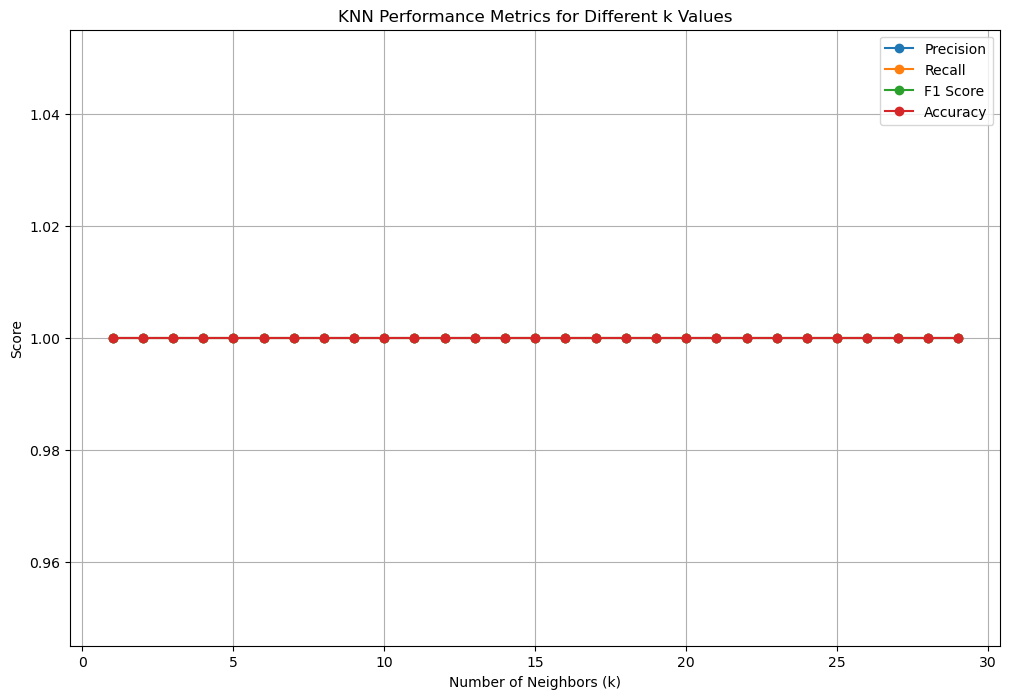

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# 加载数据集
data = load_iris()
X = data.data
y = data.target

# 划分训练集和测试集，比例 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 存储不同 k 值的性能指标
k_values = range(1, 30)
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

# 迭代测试不同的 k 值
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # 计算查准率、召回率、F1 和准确率
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# 绘制不同 k 值的性能指标图
plt.figure(figsize=(12, 8))
plt.plot(k_values, precision_scores, label="Precision", marker='o')
plt.plot(k_values, recall_scores, label="Recall", marker='o')
plt.plot(k_values, f1_scores, label="F1 Score", marker='o')
plt.plot(k_values, accuracy_scores, label="Accuracy", marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("KNN Performance Metrics for Different k Values")
plt.legend()
plt.grid()

# 寻找肘点（最大F1分数对应的k值）
best_k = k_values[np.argmax(f1_scores)]
best_f1 = max(f1_scores)
print(f"最佳的 k 值: {best_k}，对应的 F1 分数: {best_f1:.2f}")

# 再训练模型并显示最终结果
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# 输出最终的查准率、召回率、F1分数和准确率
print("最终模型性能:")
print(f"Precision: {precision_score(y_test, y_pred_best, average='macro'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best, average='macro'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best, average='macro'):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")

# 显示图形
plt.show()


最佳的 k 值: 5，对应的 F1 分数: 0.98
最终模型性能:
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Accuracy: 0.98


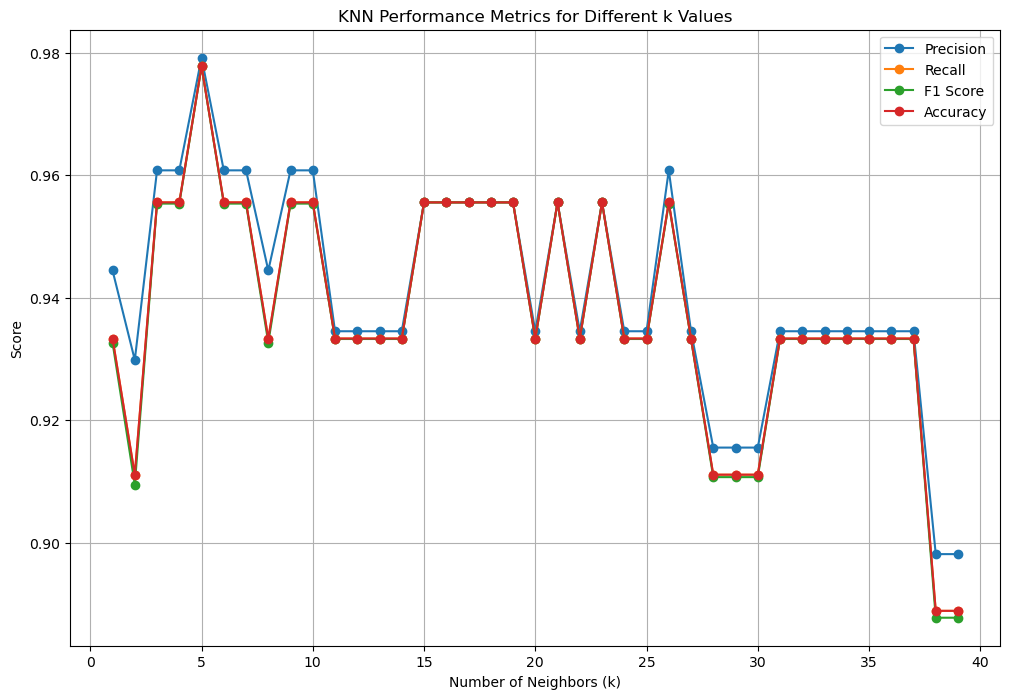

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# 加载数据集
data = load_iris()
X = data.data
y = data.target

# 划分训练集和测试集，比例 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 存储不同 k 值的性能指标
k_values = range(1, 40)  # 将 k 值范围限制为 [1, 40]
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

# 迭代测试不同的 k 值
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)#,metric='minkowski')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # 计算查准率、召回率、F1 和准确率
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# 绘制不同 k 值的性能指标图
plt.figure(figsize=(12, 8))
plt.plot(k_values, precision_scores, label="Precision", marker='o')
plt.plot(k_values, recall_scores, label="Recall", marker='o')
plt.plot(k_values, f1_scores, label="F1 Score", marker='o')
plt.plot(k_values, accuracy_scores, label="Accuracy", marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("KNN Performance Metrics for Different k Values")
plt.legend()
plt.grid()

# 寻找肘点（最大F1分数对应的k值）
best_k = k_values[np.argmax(f1_scores)]
best_f1 = max(f1_scores)
print(f"最佳的 k 值: {best_k}，对应的 F1 分数: {best_f1:.2f}")

# 再训练模型并显示最终结果
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# 输出最终的查准率、召回率、F1分数和准确率
print("最终模型性能:")
print(f"Precision: {precision_score(y_test, y_pred_best, average='macro'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best, average='macro'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best, average='macro'):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")

# 显示图形
plt.show()
